#ABOUT THE PROJECT

# General

In [223]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
# Load data
pesticides_data = pd.read_csv('/content/pesticides.csv')
rainfall_data = pd.read_csv('/content/rainfall.csv')
temperature_data = pd.read_csv('/content/temp.csv')
yield_data = pd.read_csv('/content/yield.csv')

#Data Preparation


## Rainfall data

In [225]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [226]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1    Year            272832 non-null  int64  
 2    Statistics      272832 non-null  object 
 3    Country         272832 non-null  object 
 4    ISO3            272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [227]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [228]:
pesticides_data.columns = pesticides_data.columns.str.strip()
rainfall_data.columns = rainfall_data.columns.str.strip()
temperature_data.columns = temperature_data.columns.str.strip()
yield_data.columns = yield_data.columns.str.strip()

## DROP COUNTRIES NOT IN SUB  SAHARAN REGION

In [229]:
# Number of countries
len(rainfall_data['Country'].unique())

196

In [231]:
rainfall_data.isnull().sum()

Rainfall - (MM)    0
Year               0
Statistics         0
Country            0
ISO3               0
dtype: int64

In [232]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [233]:
# One year from Afghanistan
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [234]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


## Temperature data

In [235]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [236]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [237]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [238]:
# Number of countries
len(temperature_data['Country'].unique())

196

In [239]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [240]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [241]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050



## Yield data

In [242]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [243]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [244]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [245]:
# Number of countries
len(yield_data['Area'].unique())

203

In [246]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [247]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


## Pesticides data

In [248]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [249]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [250]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [251]:
# Number of countries
len(pesticides_data['Area'].unique())

172

In [252]:
# Number of years (1990 - 2018)
len(pesticides_data['Item'].unique())

1

In [253]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element','Unit','Item'], axis=1)
pesticides_df

,Area,Year,Value
0,Albania,1990,121
1,Albania,1991,121
2,Albania,1992,121
3,Albania,1993,121
4,Albania,1994,201
...,...,...,...
4784,Zimbabwe,2014,2185
4785,Zimbabwe,2015,2185
4786,Zimbabwe,2016,2185
4787,Zimbabwe,2017,2185


## Merging

In [254]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [255]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [256]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [257]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)

In [258]:
rainfall_df.columns

Index(['Year', 'Country', 'ISO3', 'Rainfall (mm)'], dtype='object')

In [259]:
temperature_df.columns

Index(['Year', 'Country', 'ISO3', 'Temperature (Celsius)'], dtype='object')

In [260]:
rainfall_df.head()

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022


In [261]:
temperature_df.head()

,Year,Country,ISO3,Temperature (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725


In [262]:
yield_df.head()

,Country,Item,Year,Yield (hg/ha)
0,Afghanistan,Barley,1961,10800
1,Afghanistan,Barley,1962,10800
2,Afghanistan,Barley,1963,10800
3,Afghanistan,Barley,1964,10857
4,Afghanistan,Barley,1965,10857


In [263]:
yield_df.isnull().sum()

Country          0
Item             0
Year             0
Yield (hg/ha)    0
dtype: int64

In [264]:
rainfall_df['Country'].head()

0     Afghanistan
1         Albania
2         Algeria
3         Andorra
4          Angola
Name: Country, dtype: object

In [265]:
rainfall_df['Country'] = rainfall_df['Country'].str.replace(" ", "")

In [266]:
temperature_df['Country']= temperature_df['Country'].str.replace(" ", "")

In [267]:
temperature_df['Country'].str.len()


0        11
1         7
2         7
3         7
4         6
         ..
22731     9
22732     7
22733     5
22734     6
22735     8
Name: Country, Length: 22736, dtype: int64

In [421]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,812.23450,12.051221,121,10000
1,1990,Albania,Carrots and turnips,812.23450,12.051221,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.23450,12.051221,121,171429
3,1990,Albania,Garlic,812.23450,12.051221,121,65000
4,1990,Albania,Maize,812.23450,12.051221,121,36613
...,...,...,...,...,...,...,...
22896,2016,Zimbabwe,Maize,455.13295,22.310167,2185,4405
22897,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
22898,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
22899,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


# Drop countries no in africa

In [422]:
df = data

In [423]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan',
       'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cyprus',
       'Denmark', 'Ecuador', 'Egypt', 'Fiji', 'Finland', 'France',
       'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Pakistan',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania

In [424]:
country =  ['Algeria',  'Angola','Benin', 'Botswana',  'Burkina Faso','Burundi',  'Cameroon', 'Canada', 'Cape Verde','Central African Republic', ' Chad', ' Chile', ' Comoros', ' Congo (Democratic Republic of the)',
       'Congo (Republic of the)',  "Cote d'Ivoire",  'Djibouti', 
       'Egypt',  'Equatorial Guinea', 'Eritrea',
      'Ethiopia', 'Faroe Islands',
       'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Malawi', 'Malaysia','Mali', 'Malta', 'Niger', 'Nigeria', 
      'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone','Somalia', 'South Africa', 'South Sudan', 'Sudan','United Republic of Tanzania', 
       'Togo',  'Tunisia', 'Turkey','Uganda', 'Zambia', 'Zimbabwe']

In [425]:
df = data[data.Country.isin(country) == True]

In [426]:
df.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
10,1990,Algeria,Barley,89.74373,23.426192,5743,7610
11,1990,Algeria,Carrots and turnips,89.74373,23.426192,5743,72302
12,1990,Algeria,Cauliflowers and broccoli,89.74373,23.426192,5743,79898
13,1990,Algeria,Garlic,89.74373,23.426192,5743,28107
14,1990,Algeria,Maize,89.74373,23.426192,5743,16500


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 10 to 22900
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4361 non-null   int64  
 1   Country                4361 non-null   object 
 2   Item                   4361 non-null   object 
 3   Rainfall (mm)          4361 non-null   float64
 4   Temperature (Celsius)  4361 non-null   float64
 5   Pesticides (tonnes)    4361 non-null   int64  
 6   Yield (hg/ha)          4361 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 272.6+ KB


In [428]:
df.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,2003.351296,665.143156,21.031191,7182.402431,78118.558129
std,7.718318,552.589236,8.004199,14847.673143,86061.417832
min,1990.000000,18.826300,-7.166322,0.000000,659.000000
25%,1997.000000,280.751400,20.580667,118.000000,15253.000000
50%,2003.000000,576.876960,22.907500,1044.000000,41898.000000
75%,2010.000000,925.349360,25.202592,3876.000000,110967.000000
max,2016.000000,3732.507000,29.541075,90839.000000,596898.000000


In [429]:
len(df['Item'].unique())

14

In [430]:
# Number of countries
len(df.Country.unique())

30

In [431]:
# Number of years (1990 - 2016)
len(df.Year.unique())

27

# Data Exploration

## Rainfall data

In [278]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


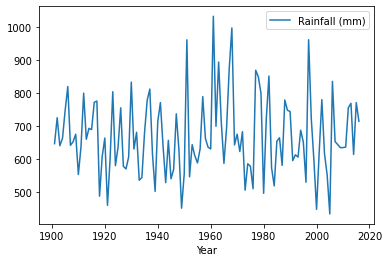

In [280]:
rainfall_df.loc[rainfall_df['Country'] == 'Kenya'].groupby('Year').mean().plot()
plt.show()

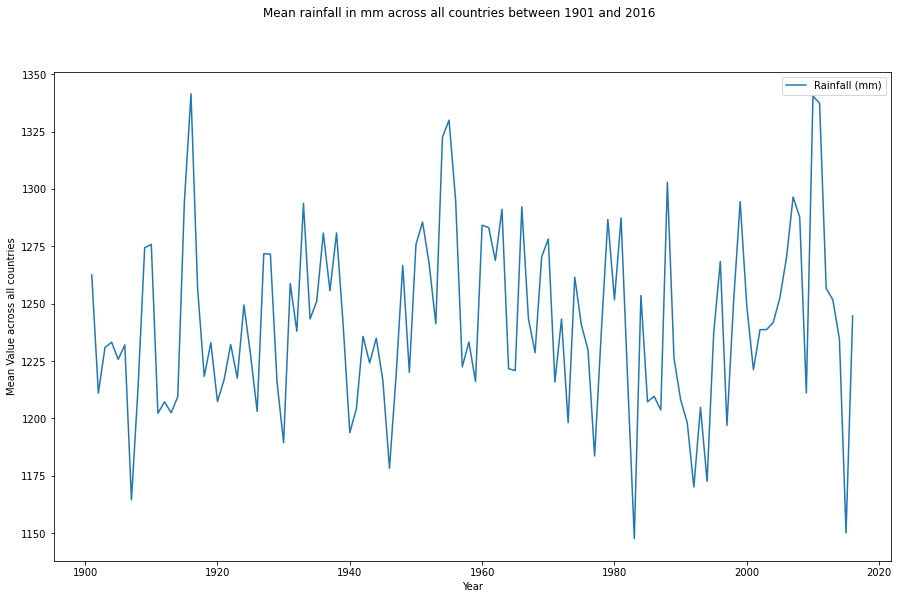

In [281]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature data

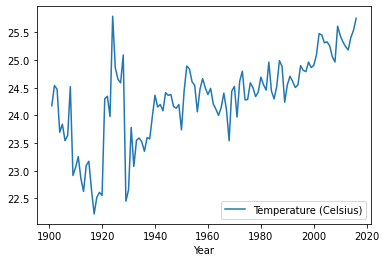

In [282]:
temperature_df.loc[temperature_df['Country'] == 'Kenya'].groupby('Year').mean().plot()
plt.show()

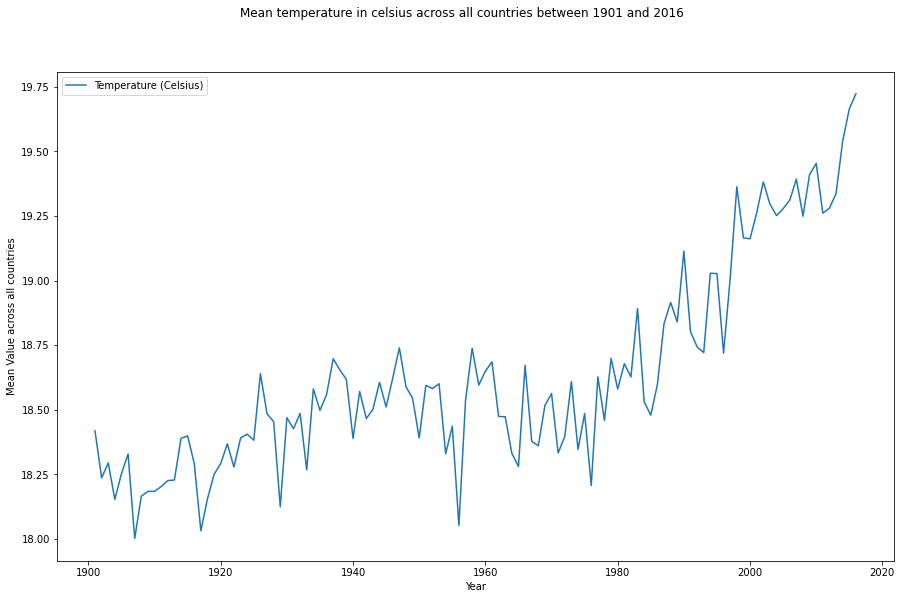

In [283]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield data

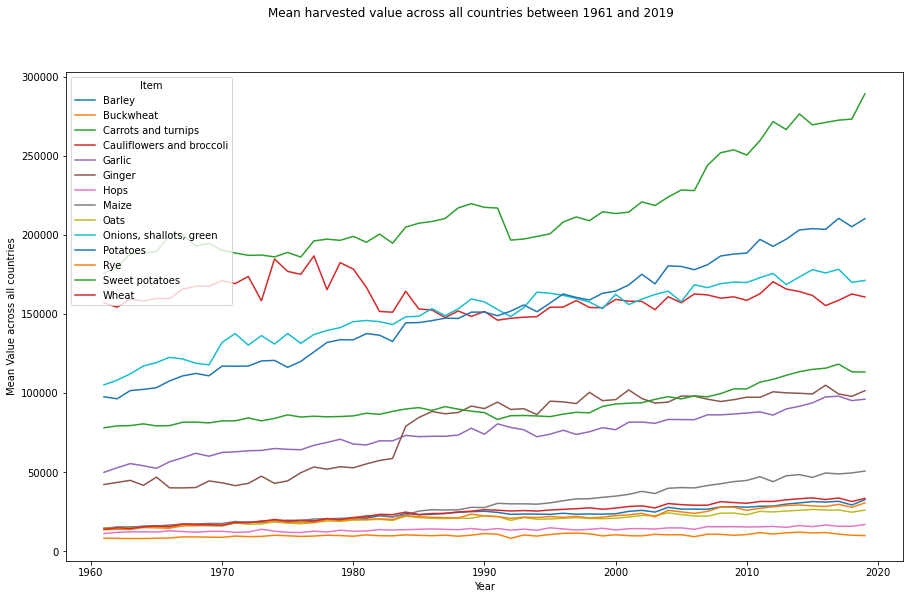

In [284]:
# prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

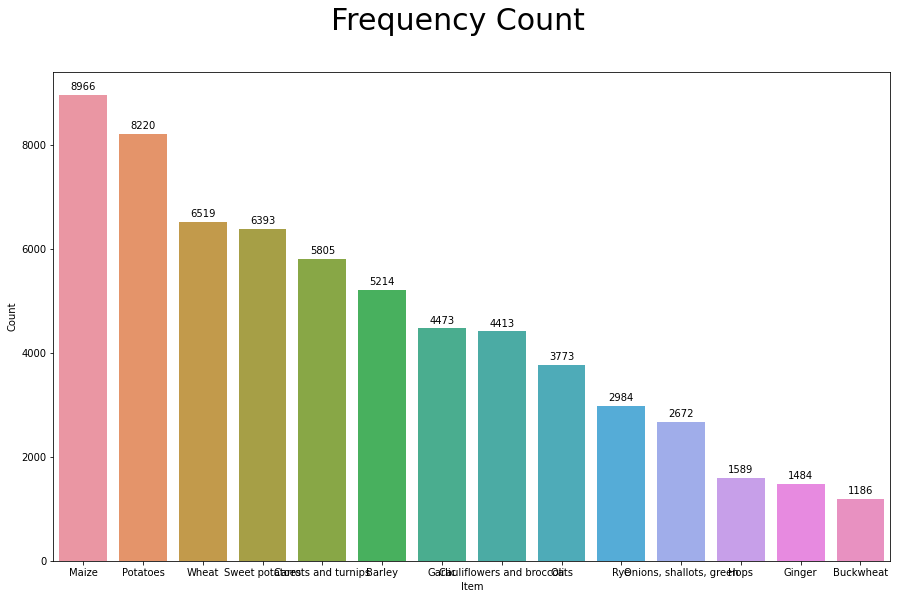

In [285]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Pesticide data

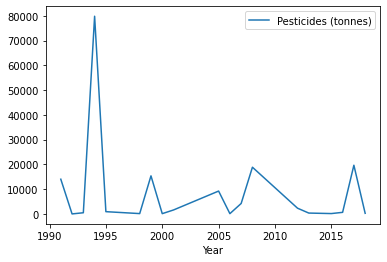

In [286]:
pesticides_df.loc[temperature_df['Country'] == 'Kenya'].groupby('Year').mean().plot()
plt.show()

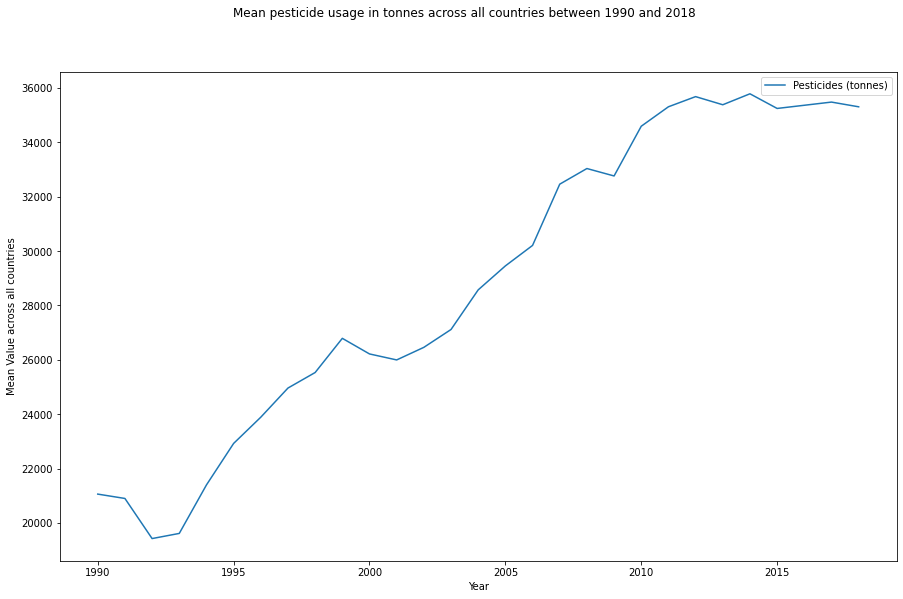

In [287]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Merged data

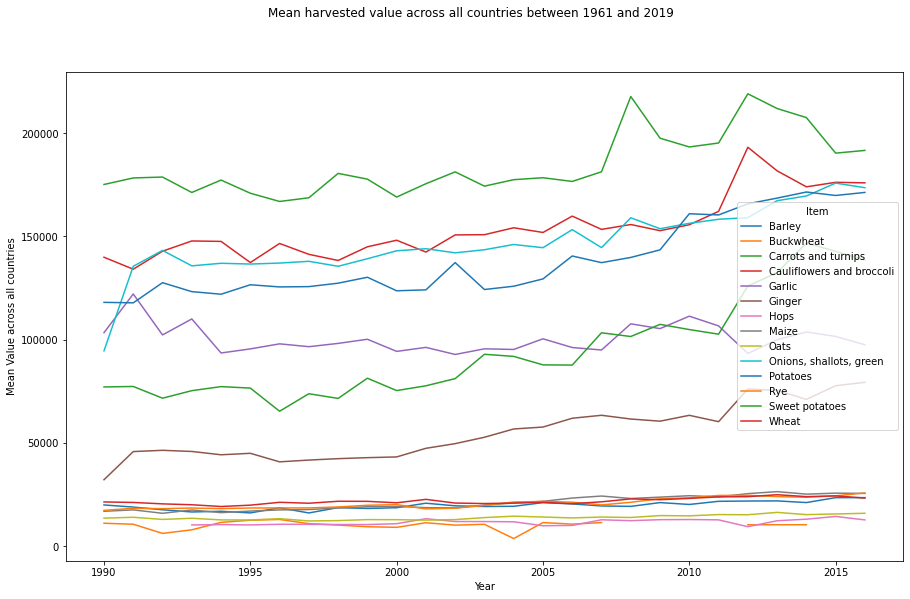

In [288]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

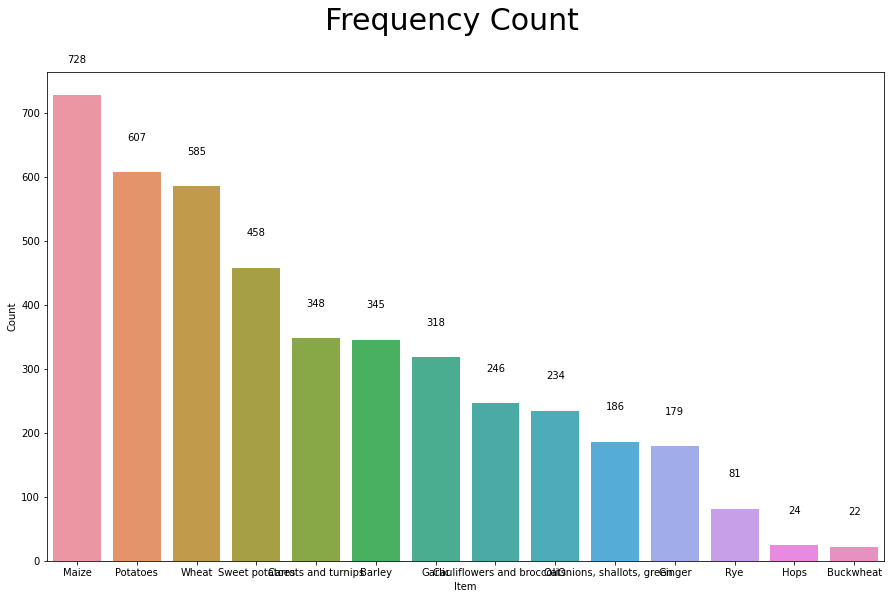

In [289]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

<ipython-input-290-4b9532546031>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


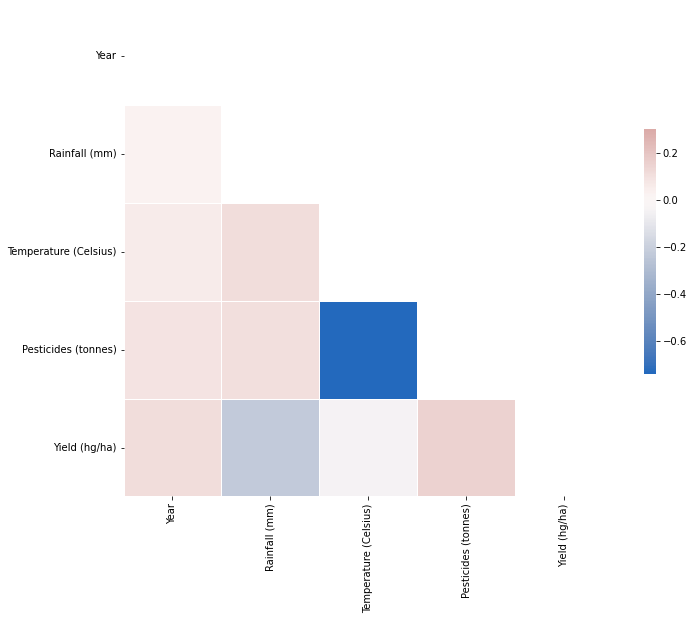

In [290]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

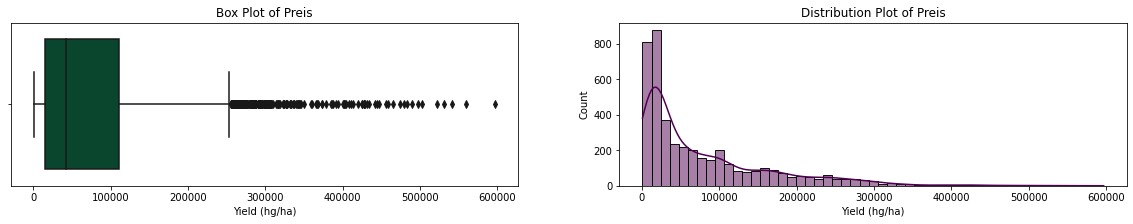

In [291]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot of Preis')

plt.subplot(1,2,2)
sns.histplot(x=data['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')
plt.show()

# Data Preprocessing

## One Hot Encoding

In [432]:
df['Item'].unique()

array(['Barley', 'Carrots and turnips', 'Cauliflowers and broccoli',
       'Garlic', 'Maize', 'Oats', 'Onions, shallots, green', 'Potatoes',
       'Wheat', 'Sweet potatoes', 'Ginger', 'Buckwheat', 'Rye', 'Hops'],
      dtype=object)

In [433]:
item_types = ('Barley', 'Carrots and turnips', 'Cauliflowers and broccoli',
       'Garlic', 'Maize', 'Oats', 'Onions, shallots, green', 'Potatoes',
       'Rye', 'Wheat', 'Sweet potatoes', 'Hops', 'Ginger', 'Buckwheat')

In [434]:
from sklearn.preprocessing import LabelEncoder
df['Item'] = pd.DataFrame(item_types, columns=['Item'])
labelencoder = LabelEncoder()
df['Item'] = labelencoder.fit_transform(df['Item'])
df

<ipython-input-434-9869dc0ed665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'] = pd.DataFrame(item_types, columns=['Item'])
<ipython-input-434-9869dc0ed665>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'] = labelencoder.fit_transform(df['Item'])


,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
10,1990,Algeria,3,89.74373,23.426192,5743,7610
11,1990,Algeria,2,89.74373,23.426192,5743,72302
12,1990,Algeria,1,89.74373,23.426192,5743,79898
13,1990,Algeria,0,89.74373,23.426192,5743,28107
14,1990,Algeria,4,89.74373,23.426192,5743,16500
...,...,...,...,...,...,...,...
22896,2016,Zimbabwe,4,455.13295,22.310167,2185,4405
22897,2016,Zimbabwe,4,455.13295,22.310167,2185,20505
22898,2016,Zimbabwe,4,455.13295,22.310167,2185,51792
22899,2016,Zimbabwe,4,455.13295,22.310167,2185,27283


In [435]:
df['Country'].unique()

array(['Algeria', 'Angola', 'Botswana', 'Burundi', 'Cameroon', 'Canada',
       'Egypt', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Libya', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Niger',
       'Rwanda', 'Senegal', 'Togo', 'Tunisia', 'Turkey', 'Uganda',
       'Zambia', 'Zimbabwe', 'Eritrea', 'Ethiopia', 'Sudan'], dtype=object)

In [436]:
country_types = ('Algeria', 'Angola', 'Botswana', 'Burundi', 'Cameroon', 'Canada',
       'Egypt', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Libya', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Niger',
       'Rwanda', 'Senegal', 'Togo', 'Tunisia', 'Turkey', 'Uganda',
       'Zambia', 'Zimbabwe', 'Eritrea', 'Ethiopia', 'Sudan')

In [437]:
from sklearn.preprocessing import LabelEncoder
df['Country'] = pd.DataFrame(country_types, columns=['Country'])
labelencoder = LabelEncoder()
df['Country'] = labelencoder.fit_transform(df['Country'])
df

<ipython-input-437-62c580b1ff35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = pd.DataFrame(country_types, columns=['Country'])
<ipython-input-437-62c580b1ff35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = labelencoder.fit_transform(df['Country'])


,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
10,1990,0,3,89.74373,23.426192,5743,7610
11,1990,1,2,89.74373,23.426192,5743,72302
12,1990,2,1,89.74373,23.426192,5743,79898
13,1990,3,0,89.74373,23.426192,5743,28107
14,1990,4,4,89.74373,23.426192,5743,16500
...,...,...,...,...,...,...,...
22896,2016,14,4,455.13295,22.310167,2185,4405
22897,2016,14,4,455.13295,22.310167,2185,20505
22898,2016,14,4,455.13295,22.310167,2185,51792
22899,2016,14,4,455.13295,22.310167,2185,27283


In [438]:
df.dtypes

Year                       int64
Country                    int64
Item                       int64
Rainfall (mm)            float64
Temperature (Celsius)    float64
Pesticides (tonnes)        int64
Yield (hg/ha)              int64
dtype: object

In [439]:
df.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
10,1990,0,3,89.74373,23.426192,5743,7610
11,1990,1,2,89.74373,23.426192,5743,72302
12,1990,2,1,89.74373,23.426192,5743,79898
13,1990,3,0,89.74373,23.426192,5743,28107
14,1990,4,4,89.74373,23.426192,5743,16500


## Removing of Outliers

In [403]:
df.shape

(4361, 8)

In [440]:
from scipy import stats

y = df['Yield (hg/ha)']
X = df.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [444]:
data.shape

(4352, 7)

## Feature Scaling

In [445]:
data.shape

(4352, 7)

In [409]:
data.shape

(4361, 8)

# Modeling

In [465]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [466]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [480]:
df.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
10,1990,0,3,89.74373,23.426192,5743,7610
11,1990,1,2,89.74373,23.426192,5743,72302
12,1990,2,1,89.74373,23.426192,5743,79898
13,1990,3,0,89.74373,23.426192,5743,28107
14,1990,4,4,89.74373,23.426192,5743,16500


In [468]:

from sklearn import linear_model
model = linear_model.LinearRegression()

In [469]:
model.fit(X_train, y_train)
     

LinearRegression()

In [414]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [58]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.8 MB/s eta 0:00:00


In [461]:
import catboost as cb

In [462]:
model2 = cb.CatBoostRegressor()

In [463]:
model2.fit(X_train, y_train) 

Learning rate set to 0.049862
0:	learn: 85739.3859119	total: 2.2ms	remaining: 2.2s
1:	learn: 85046.4130758	total: 4.95ms	remaining: 2.47s
2:	learn: 84445.6546881	total: 7.61ms	remaining: 2.53s
3:	learn: 83995.4550484	total: 12.1ms	remaining: 3.01s
4:	learn: 83393.5989886	total: 16.7ms	remaining: 3.31s
5:	learn: 82930.5108193	total: 21.5ms	remaining: 3.57s
6:	learn: 82518.1053541	total: 29.3ms	remaining: 4.16s
7:	learn: 82126.7801263	total: 33.2ms	remaining: 4.11s
8:	learn: 81728.1483275	total: 37.8ms	remaining: 4.16s
9:	learn: 81374.1756711	total: 41.5ms	remaining: 4.11s
10:	learn: 80992.8190399	total: 49.2ms	remaining: 4.43s
11:	learn: 80709.9158409	total: 52.5ms	remaining: 4.32s
12:	learn: 80427.9185614	total: 57.8ms	remaining: 4.39s
13:	learn: 80178.3248180	total: 62.8ms	remaining: 4.42s
14:	learn: 79898.7614089	total: 67.7ms	remaining: 4.44s
15:	learn: 79674.8374164	total: 76.2ms	remaining: 4.69s
16:	learn: 79424.5455093	total: 80.8ms	remaining: 4.67s
17:	learn: 79188.7302581	total

In [470]:

from sklearn.metrics import r2_score
y_pred = model2.predict(X_test)
r2_score(y_test, y_pred)

0.014310050245199935

In [313]:
from sklearn import linear_model
model2 = linear_model.LinearRegression()

In [319]:
y_train.head()

11581    333420
9804       2947
6888      15173
17729     29568
13725    114420
Name: Yield (hg/ha), dtype: int64

# Deployment of the model

In [472]:
import pickle
pickle.dump(model2, open('model6.pkl', 'wb'))